In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.signal import find_peaks
from scipy.optimize import curve_fit


## Mineral Oil T2

In [55]:

df = pd.read_csv('/Users/marieriddle/Desktop/PHY312/SpinEcho/MG_T2_MinOil_2actual', delim_whitespace=True, header=None)

col1 = df[0]
col2 = df[1]
col3 = df[2]


/var/folders/sb/jfsvqf1n6q123hsfxrmln4940000gn/T/ipykernel_84017/3557954494.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/Users/marieriddle/Desktop/PHY312/SpinEcho/MG_T2_MinOil_2actual', delim_whitespace=True, header=None)


In [57]:
array=df.values

In [59]:
array

array([[-0.00025 , -0.071124, -0.065274],
       [-0.000245, -0.057833, -0.065562],
       [-0.00024 , -0.069503, -0.064836],
       ...,
       [ 0.024735, -0.071448, -0.065589],
       [ 0.02474 , -0.05524 , -0.065159],
       [ 0.024745, -0.033521, -0.065258]])

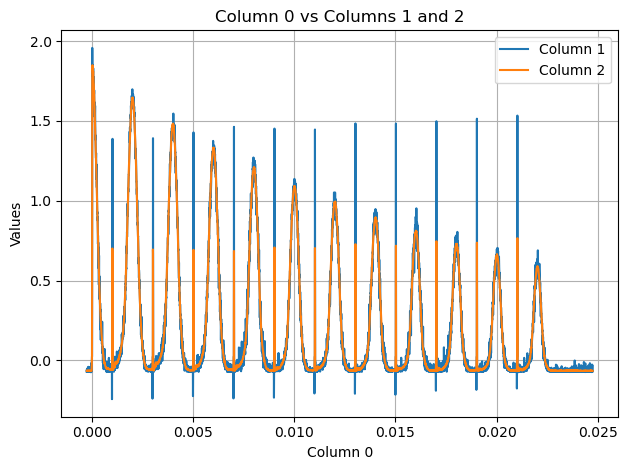

In [65]:
plt.plot(array[:, 0], array[:, 1], label='Column 1')
plt.plot(array[:, 0], array[:, 2], label='Column 2')
plt.xlabel('Column 0')
plt.ylabel('Values')
plt.title('Column 0 vs Columns 1 and 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
time = df[0].values
signal = df[2].values



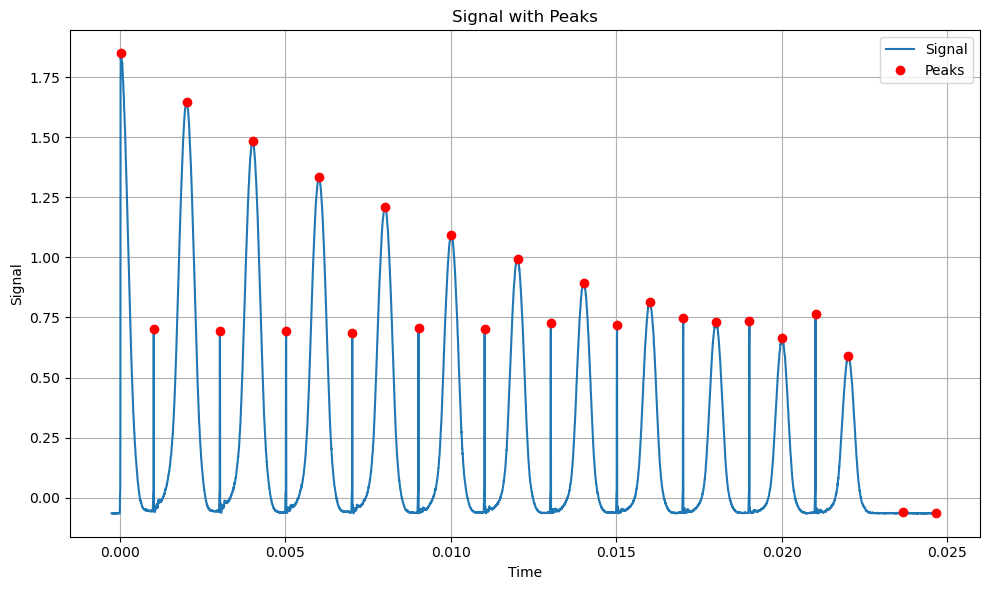

In [71]:


dt = np.mean(np.diff(time))

min_time_between_peaks = 0.0009
min_samples_between_peaks = int(min_time_between_peaks / dt)

peaks, _ = find_peaks(signal, distance=min_samples_between_peaks)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, signal, label='Signal')
plt.plot(time[peaks], signal[peaks], 'ro', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Signal with Peaks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
prelim_peaktimes=time[peaks]
prelim_peaksignals=signal[peaks]

In [75]:
prelim_peaktimes

array([3.5000e-05, 1.0200e-03, 2.0250e-03, 3.0200e-03, 4.0100e-03,
       5.0250e-03, 6.0100e-03, 7.0250e-03, 8.0200e-03, 9.0250e-03,
       1.0005e-02, 1.1025e-02, 1.2030e-02, 1.3025e-02, 1.4025e-02,
       1.5025e-02, 1.6015e-02, 1.7025e-02, 1.8030e-02, 1.9025e-02,
       2.0020e-02, 2.1025e-02, 2.2020e-02, 2.3660e-02, 2.4655e-02])

In [77]:
indices_to_remove = [1,3,5,7,9,11,13,15,17,19,21,23,24]  # 0-based
peaktimes = np.delete(prelim_peaktimes, indices_to_remove, axis=0)
peaksignals = np.delete(prelim_peaksignals, indices_to_remove, axis=0)
peaktimes

array([3.5000e-05, 2.0250e-03, 4.0100e-03, 6.0100e-03, 8.0200e-03,
       1.0005e-02, 1.2030e-02, 1.4025e-02, 1.6015e-02, 1.8030e-02,
       2.0020e-02, 2.2020e-02])

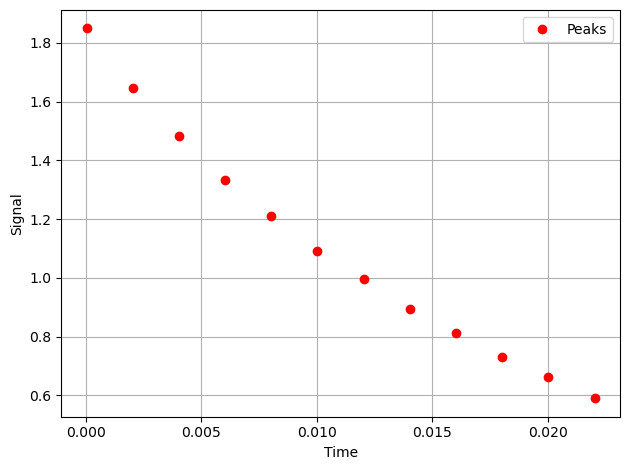

In [79]:
plt.plot(peaktimes, peaksignals, 'ro', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:

def exp_func(x, t, a, c):
    return a * np.exp(-x/t) + c

popt, pcov = curve_fit(exp_func, peaktimes, peaksignals)

t_opt, a_opt, c_opt = popt
print(f"Fitted parameters: T2 = {t_opt:.3f}, a = {a_opt:.3f}, c = {c_opt:.3f}")

perr = np.sqrt(np.diag(pcov))  # standard error for each param


print("Standard Deviation Errors", perr)



Fitted parameters: T2 = 0.018, a = 1.758, c = 0.082
Standard Deviation Errors [0.00070823 0.03637965 0.03967686]


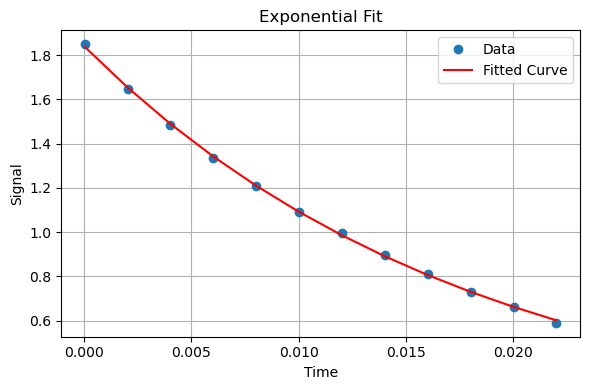

In [83]:
plt.figure(figsize=(6, 4))
plt.plot(peaktimes, peaksignals, 'o', label='Data')
plt.plot(peaktimes, exp_func(peaktimes, t_opt, a_opt, c_opt), 'r-', label='Fitted Curve')

plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Exponential Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/sb/jfsvqf1n6q123hsfxrmln4940000gn/T/ipykernel_84017/1581292390.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peaktimes, exp_func(peaktimes, t_opt, a_opt, c_opt), 'r-', label='Fitted Curve',color='g')


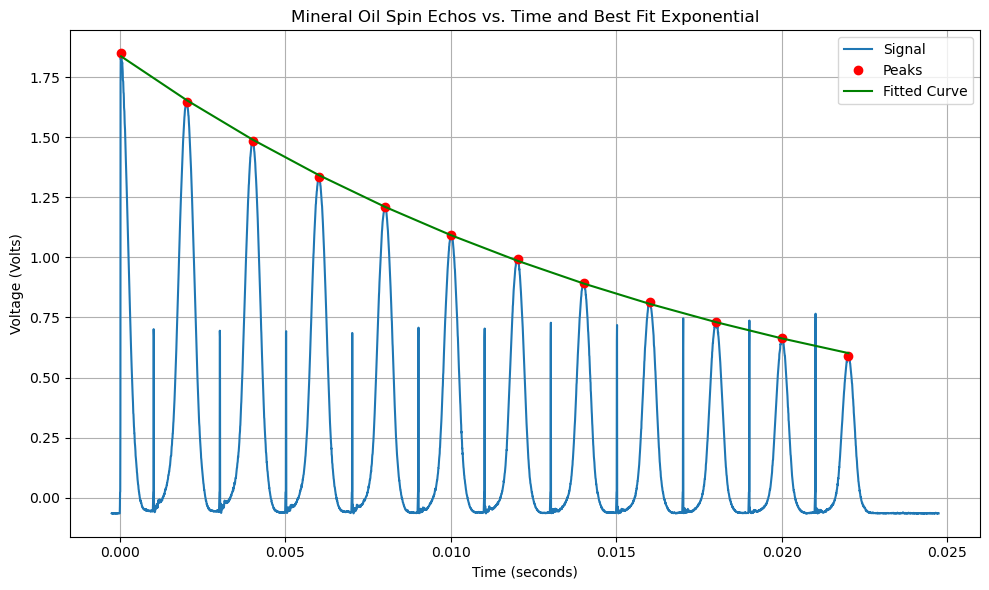

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(time, signal, label='Signal')
plt.plot(peaktimes, peaksignals, 'ro', label='Peaks')
plt.plot(peaktimes, exp_func(peaktimes, t_opt, a_opt, c_opt), 'r-', label='Fitted Curve',color='g')

plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (Volts)')
plt.title('Mineral Oil Spin Echos vs. Time and Best Fit Exponential')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
0.005/3.5

0.0014285714285714286

## Mineral Oil T1

In [90]:
dt_data = {}
s=0
folder_path="/Users/marieriddle/Desktop/PHY312/SpinEcho/MinOilT1"
    
for filename in os.listdir(folder_path):
    if filename.startswith("DT_") and filename.endswith("_milsec"):
        try:
             # Extract the number x
            x_str = filename[3:-7]  # Between 'DT_' and '_milsec'
            x = float(x_str)
                
            # Load the file
            full_path = os.path.join(folder_path, filename)
            array = np.loadtxt(full_path)
                
            # Store in dict
            dt_data[x] = array
        except Exception as e:
            s+=1
            print(f"Skipping {filename}: {e}")

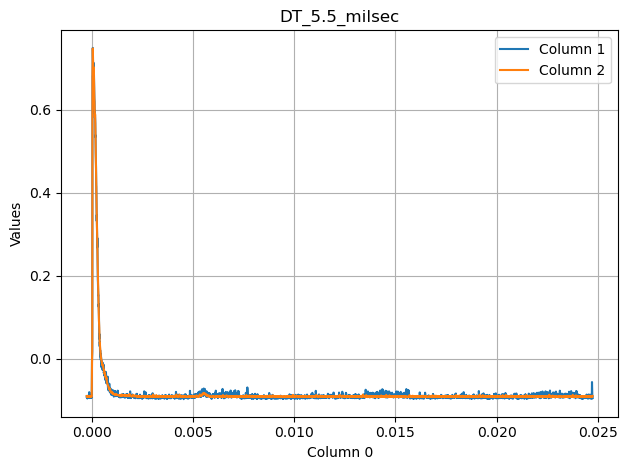

In [92]:
import matplotlib.pyplot as plt

x_value = 5.5
data = dt_data.get(x_value)

if data is not None:
    plt.plot(data[:, 0], data[:, 1], label='Column 1')
    plt.plot(data[:, 0], data[:, 2], label='Column 2')
    plt.xlabel('Column 0')
    plt.ylabel('Values')
    plt.title(f'DT_{x_value}_milsec')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"No data found for DT_{x_value}_milsec")


In [94]:

result = []

for x_val in sorted(dt_data.keys()):
    data = dt_data[x_val]
    max_col1 = np.max(data[:, 1])
    max_col2 = np.max(data[:, 2])
    result.append([x_val, max_col1, max_col2])

max_array = np.array(result)


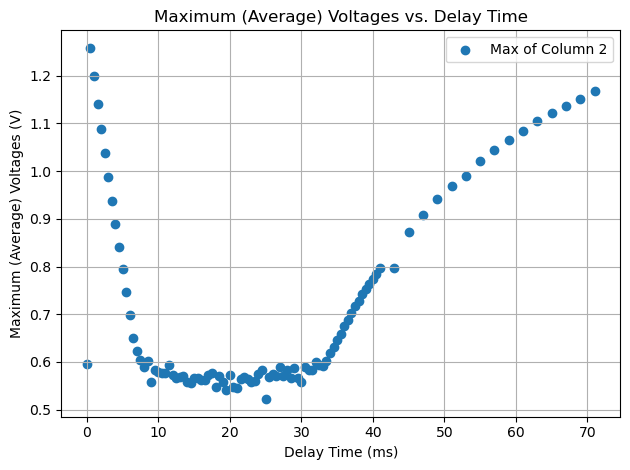

In [96]:

plt.scatter(max_array[:, 0], max_array[:, 2], label='Max of Column 2')

plt.xlabel('Delay Time (ms)')
plt.ylabel('Maximum (Average) Voltages (V)')
plt.title('Maximum (Average) Voltages vs. Delay Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [219]:
1.7/(np.log(2))

2.4525815695112376

## Water T2

In [143]:

df = pd.read_csv('/Users/marieriddle/Desktop/PHY312/SpinEcho/DT_9ms_1ms_50', delim_whitespace=True, header=None)

col1 = df[0]
col2 = df[1]
col3 = df[2]


/var/folders/sb/jfsvqf1n6q123hsfxrmln4940000gn/T/ipykernel_84017/2105672282.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/Users/marieriddle/Desktop/PHY312/SpinEcho/DT_9ms_1ms_50', delim_whitespace=True, header=None)


In [145]:
array=df.values

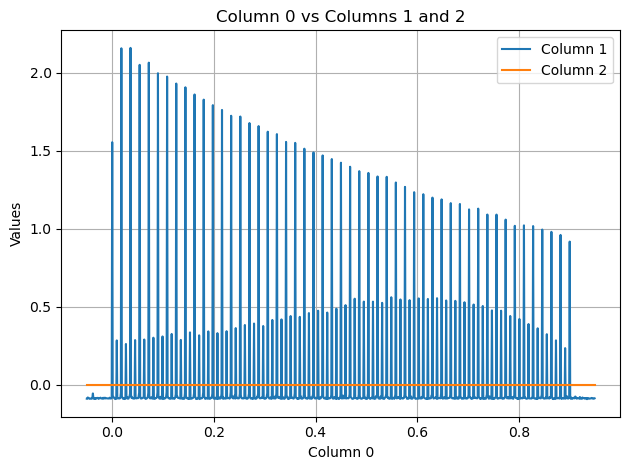

In [147]:
plt.plot(array[:, 0], array[:, 1], label='Column 1')
plt.plot(array[:, 0], array[:, 2], label='Column 2')
plt.xlabel('Column 0')
plt.ylabel('Values')
plt.title('Column 0 vs Columns 1 and 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [149]:
time = df[0].values
signal = df[1].values



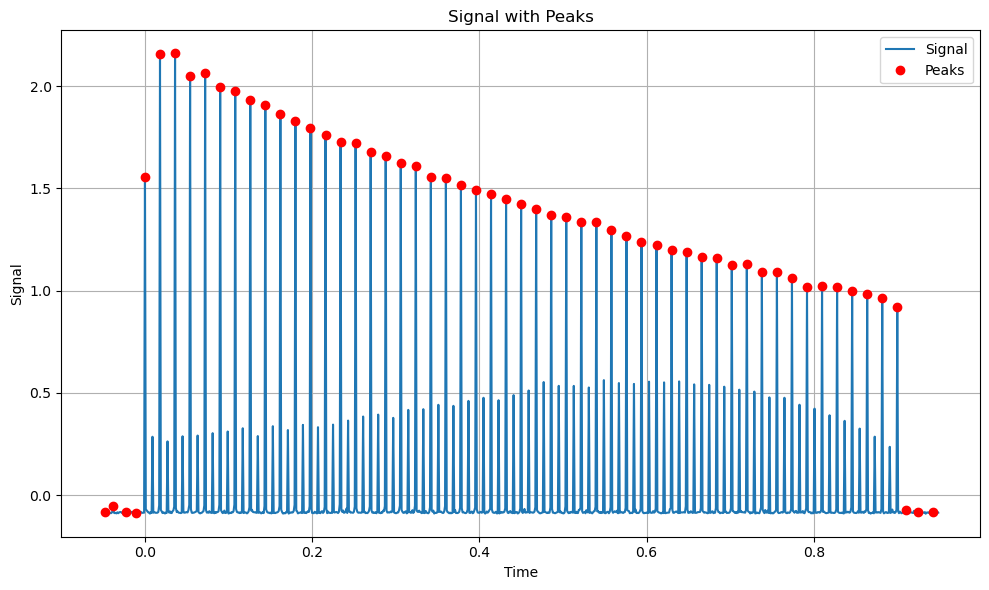

In [181]:


dt = np.mean(np.diff(time))

min_time_between_peaks = 0.01
min_samples_between_peaks = int(min_time_between_peaks / dt)

peaks, _ = find_peaks(signal, distance=min_samples_between_peaks)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, signal, label='Signal')
plt.plot(time[peaks], signal[peaks], 'ro', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Signal with Peaks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [183]:
prelim_peaktimes=time[peaks]
prelim_peaksignals=signal[peaks]
prelim_peaktimes

array([-0.048, -0.038, -0.023, -0.011,  0.   ,  0.018,  0.036,  0.054,
        0.072,  0.09 ,  0.108,  0.126,  0.144,  0.162,  0.18 ,  0.198,
        0.216,  0.234,  0.252,  0.27 ,  0.288,  0.306,  0.324,  0.342,
        0.36 ,  0.378,  0.396,  0.414,  0.432,  0.45 ,  0.468,  0.486,
        0.504,  0.522,  0.54 ,  0.558,  0.576,  0.594,  0.612,  0.63 ,
        0.648,  0.666,  0.684,  0.702,  0.72 ,  0.738,  0.756,  0.774,
        0.792,  0.81 ,  0.828,  0.846,  0.864,  0.882,  0.9  ,  0.911,
        0.925,  0.943])

In [185]:
indices_to_remove = [0,1,2,3,4,-1,-2,-3]  # 0-based
peaktimes = np.delete(prelim_peaktimes, indices_to_remove, axis=0)
peaksignals = np.delete(prelim_peaksignals, indices_to_remove, axis=0)
peaktimes

array([0.018, 0.036, 0.054, 0.072, 0.09 , 0.108, 0.126, 0.144, 0.162,
       0.18 , 0.198, 0.216, 0.234, 0.252, 0.27 , 0.288, 0.306, 0.324,
       0.342, 0.36 , 0.378, 0.396, 0.414, 0.432, 0.45 , 0.468, 0.486,
       0.504, 0.522, 0.54 , 0.558, 0.576, 0.594, 0.612, 0.63 , 0.648,
       0.666, 0.684, 0.702, 0.72 , 0.738, 0.756, 0.774, 0.792, 0.81 ,
       0.828, 0.846, 0.864, 0.882, 0.9  ])

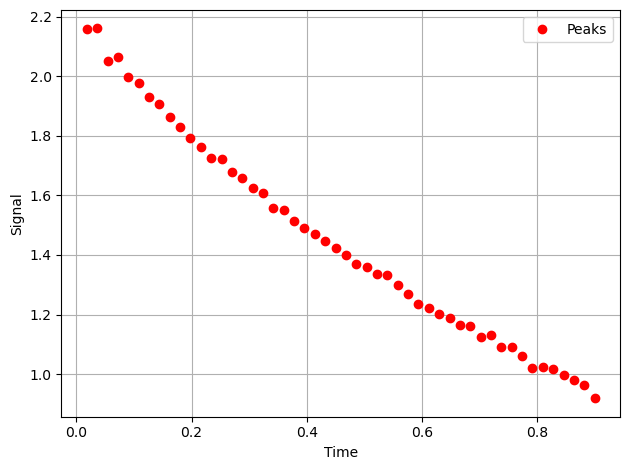

In [187]:
plt.plot(peaktimes, peaksignals, 'ro', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [189]:

def exp_func(x, t, a, c):
    return a * np.exp(-x/t) + c

popt, pcov = curve_fit(exp_func, peaktimes, peaksignals)

t_opt, a_opt, c_opt = popt
print(f"Fitted parameters: T2 = {t_opt:.3f}, a = {a_opt:.3f}, c = {c_opt:.3f}")

perr = np.sqrt(np.diag(pcov))  # standard error for each param


print("Standard Deviation Errors", perr)



Fitted parameters: T2 = 0.910, a = 1.981, c = 0.213
Standard Deviation Errors [0.03865787 0.04827492 0.05252457]


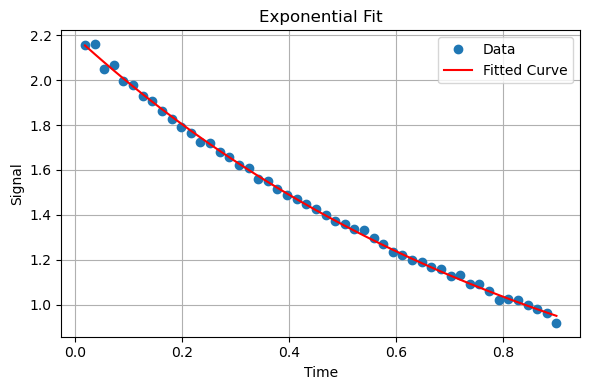

In [191]:
# Plot
plt.figure(figsize=(6, 4))
plt.plot(peaktimes, peaksignals, 'o', label='Data')
plt.plot(peaktimes, exp_func(peaktimes, t_opt, a_opt, c_opt), 'r-', label='Fitted Curve')

plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Exponential Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/sb/jfsvqf1n6q123hsfxrmln4940000gn/T/ipykernel_84017/1838209834.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peaktimes, exp_func(peaktimes, t_opt, a_opt, c_opt), 'r-', label='Fitted Curve',color='g')


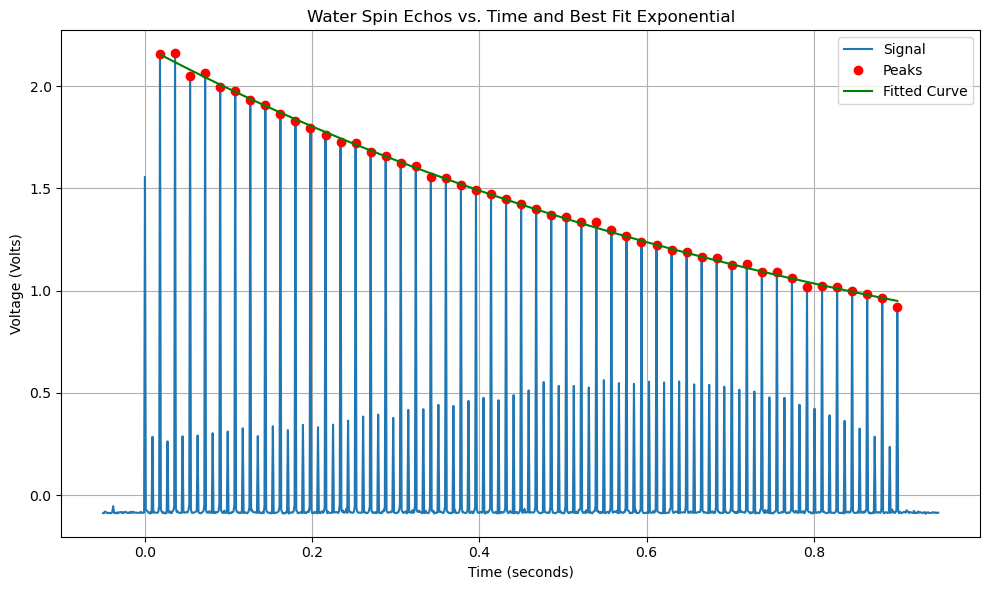

In [193]:
plt.figure(figsize=(10, 6))
plt.plot(time, signal, label='Signal')
plt.plot(peaktimes, peaksignals, 'ro', label='Peaks')
plt.plot(peaktimes, exp_func(peaktimes, t_opt, a_opt, c_opt), 'r-', label='Fitted Curve',color='g')

plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (Volts)')
plt.title('Water Spin Echos vs. Time and Best Fit Exponential')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Water T1

In [207]:
#water T1 data delay time (s), max voltage (V)

waterT1=np.array([
    [0.3,1.25],
    [0.6,0.94],
    [0.9,0.65],
    [1.2,0.24],
    [1.5,-0.02],
    [1.6,-0.06],
    [1.7,-0.07],
    [1.8,-0.07],
    [1.9,0.06],
    [2.0,0.09],
    [2.1,0.15],
    [2.2,0.16],
    [2.3,0.27],
    [2.4,0.34],
    [2.7,0.54],
    [3.0,0.74],
    [3.3,0.77],
    [3.6,0.94],])

waterT1[1]

array([0.6 , 0.94])

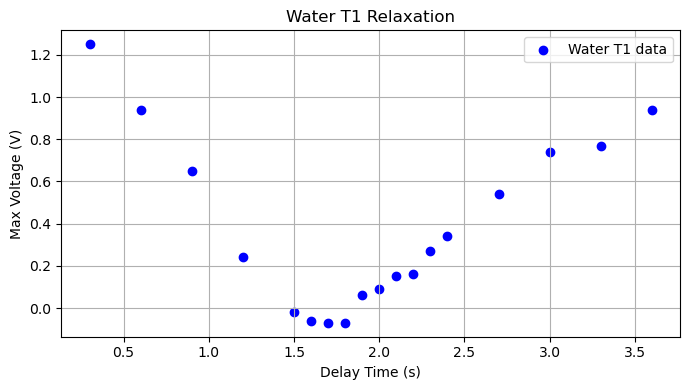

In [215]:
times = waterT1[:, 0]
voltages = waterT1[:, 1]

times = waterT1[:, 0]
voltages = waterT1[:, 1]

plt.figure(figsize=(7, 4))
plt.scatter(times, voltages, color='blue', label='Water T1 data')
plt.xlabel("Delay Time (s)")
plt.ylabel("Max Voltage (V)")
plt.title("Water T1 Relaxation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
